# Campanha Nascional de Vacinação da Covid-19

# Descrição dos dados (qual a URL? qual o domínio? como os dados foram processados?)


In [ ]:
import sqlite3
import io
import pandas as pd
import gdown

id = "1TgYjg4WmlcTKTK2f0qeqPLSltIsdvkbi"
url = "https://drive.google.com/uc?id="
outFile = "database.db"

gdown.download(url+id, outFile, quiet=True)

'database.db'

In [ ]:
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
cursor.execute("PRAGMA foreign_keys=0")
cursor.execute("PRAGMA cache_size = 0")


Para a realização deste trabalho foi escolhido o banco de dados [Campanha Nacional de Vacinação da
Covid-19](https://dados.gov.br/dataset/covid-19-vacinacao)
, nele está contido os seguintes arquivos.

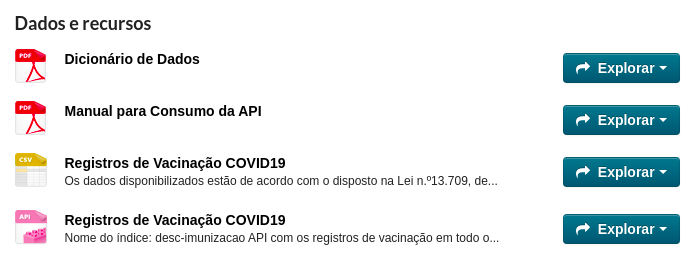


Devido a impossibilidade de obter os dados fornecidos no formado csv, foi necessário utilizar a api disponibilizada, para isso seguimos as instruções contidas no "Manual para Consumo da API", utilizamos a plataforma [postman](https://postman.com) para a obtenção dos dados, sendo que, no total, foram obtidas dez mil instâncias. Estes dados estavam em formato .JSON e utlizamos o site https://www.convertjson.com/json-to-sql.htm para converter o json para sql

Com o arquivo .sql em mãos inicializamos o banco de dados usando python em conjunto com o módulo sqlite, como pode ser visto acima.

O banco de dados obtido não estava normalizado. Utilizando o esquema de dados disponibilizado no Dicionário de Dados, foi realizado a normalização até a forma 3FN, conforme foi ensinado em aula.
Para realizar a manipulação do banco de dados, afim de se obiter a forma 3FN, foi utilizado o software [DB BROWSWE SQLITE](https://sqlitebrowser.org).

4. Diagrama ER

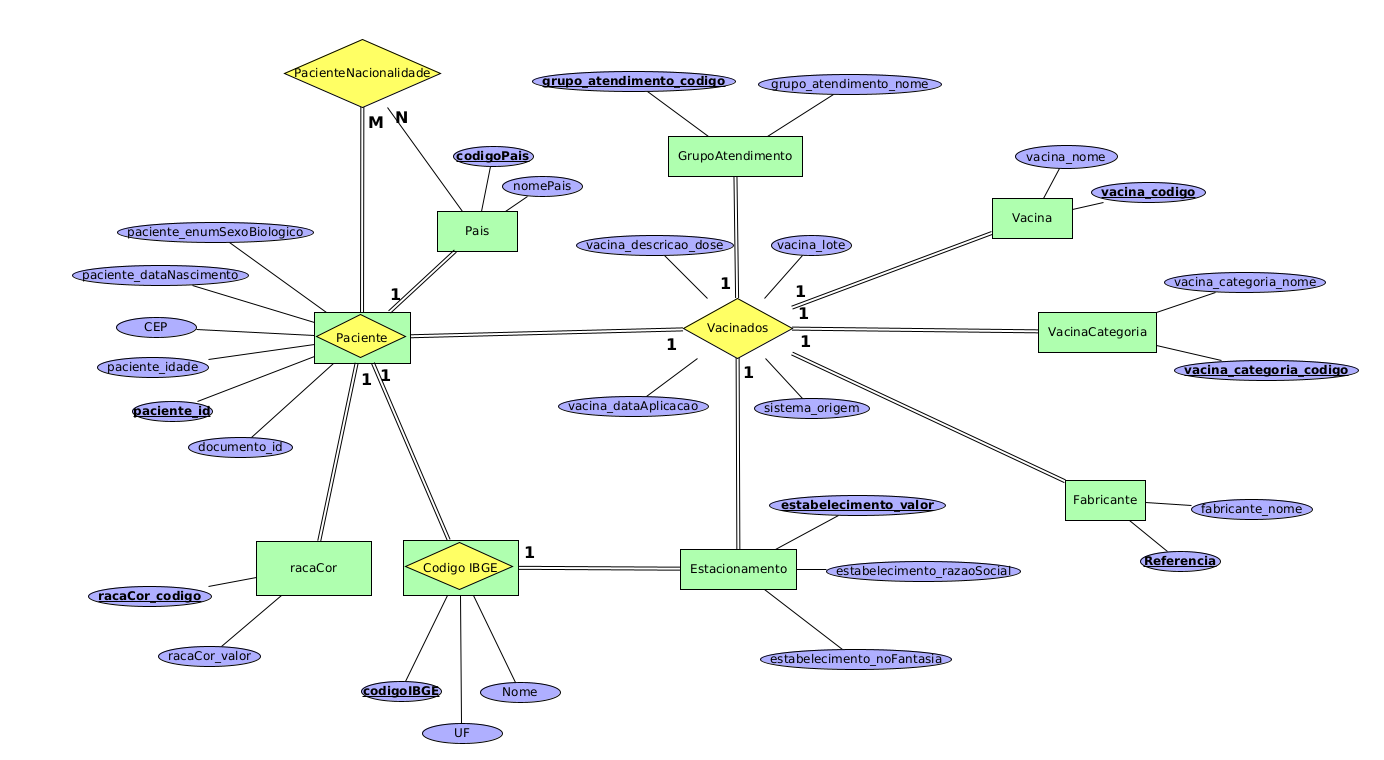

#  Diagrama relacional

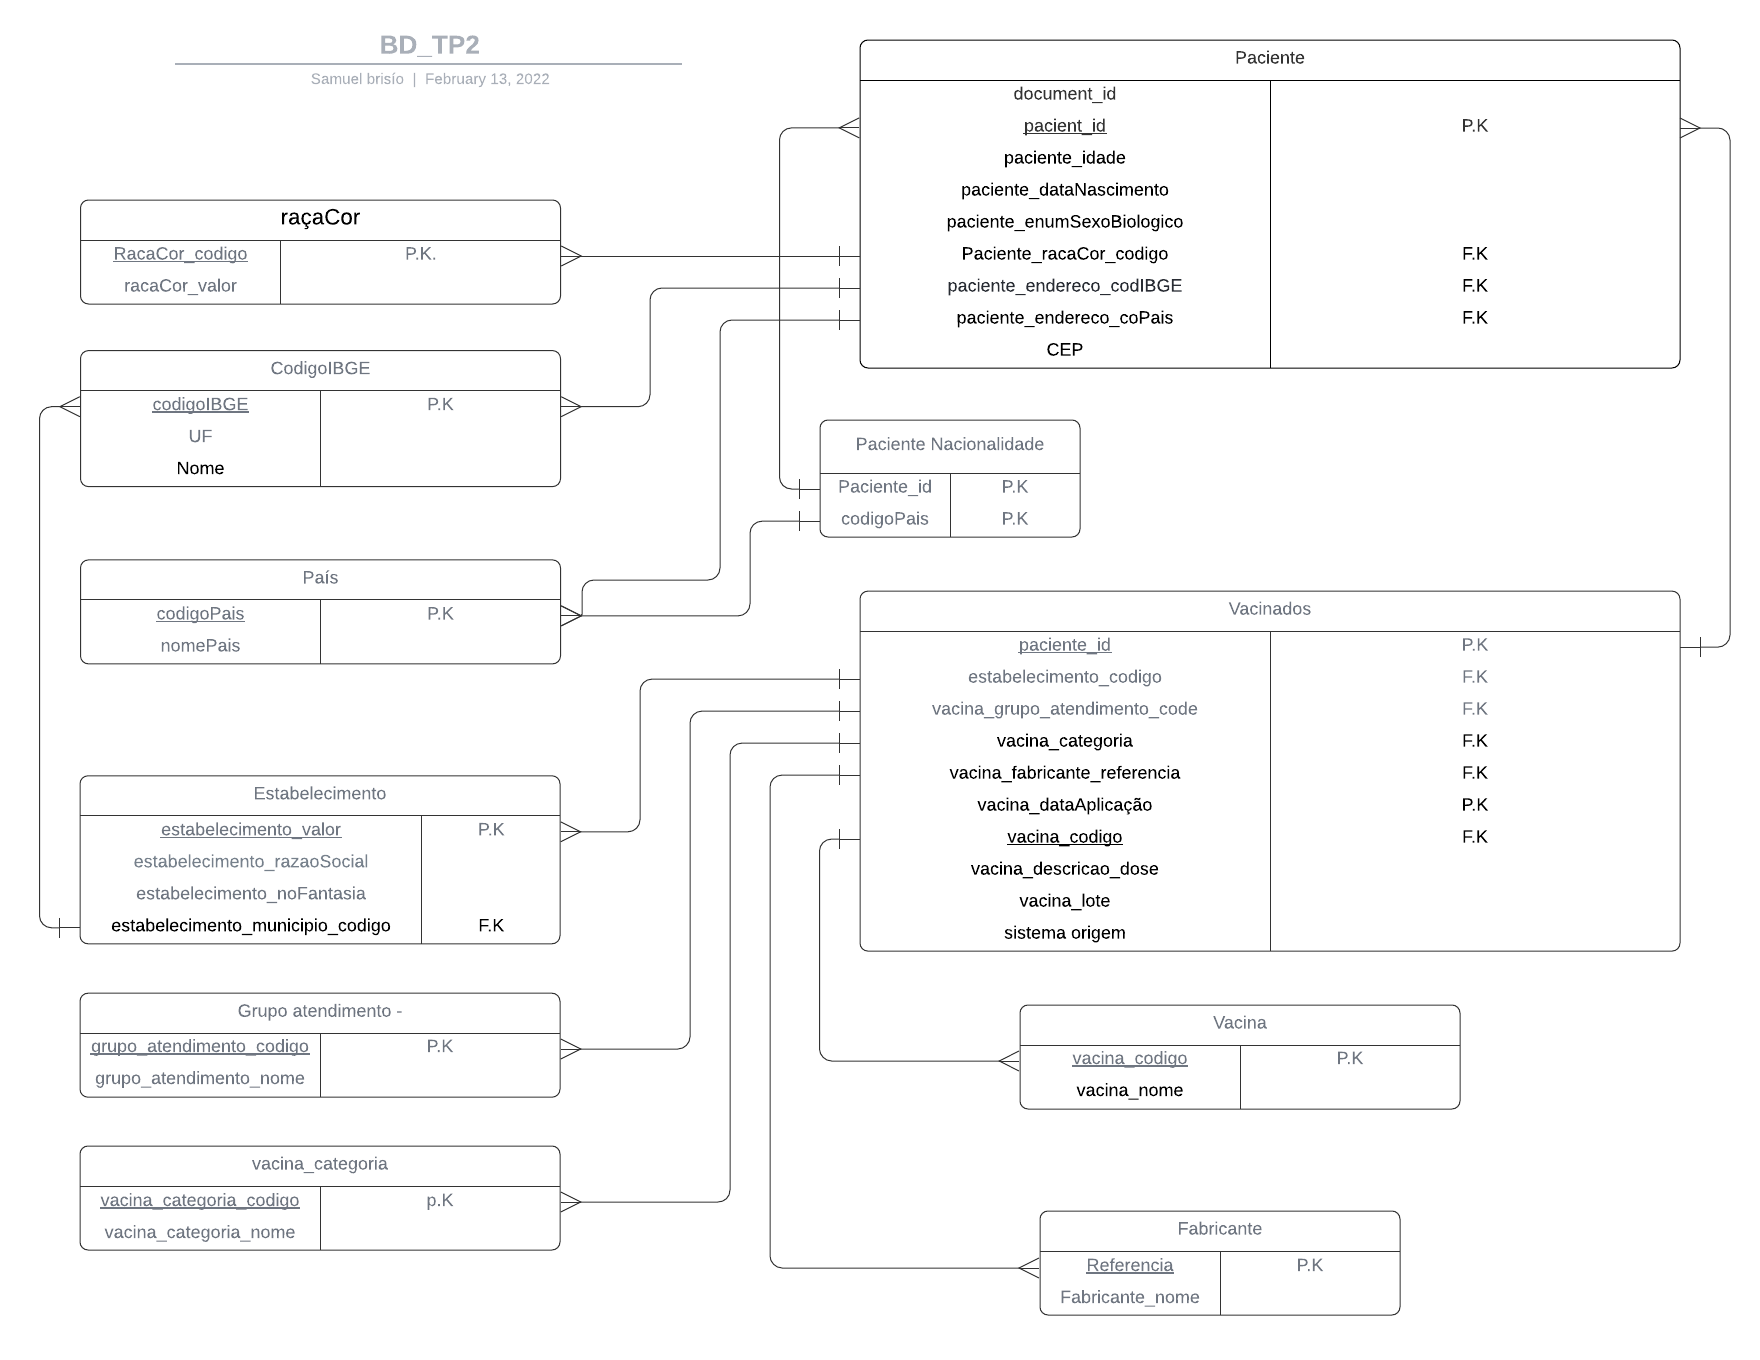

#  Consultas

## 1 Duas consultas envolvendo seleção e projeção

### 1.1 Consulta 1 (duas versões)
Lista o Nome dos três Estabelecimentos que apresentaram o maior número de vacinados e o respectivo número de vacinados

In [ ]:
#%%timeit
query = """
  SELECT
    ESTABELECIMENTO_NOFANTASIA AS NOME, COUNT(EstabelecimentoValor) AS NUMVACINADOS
  FROM
    Estabelecimento AS E JOIN VACINADOS AS V ON E.estabelecimentoValor = V.ESTABELECIMENTO_CODIGO
  GROUP BY
    estabelecimentoValor ORDER BY COUNT(estabelecimentoValor) DESC
    LIMIT 3
"""

df = pd.read_sql_query(query, connection)
df

,NOME,NUMVACINADOS
0,UAPS MESSEJANA,964
1,CARTAO SUS DE JOAO PESSOA,665
2,UAPS LUIS COSTA,343


In [ ]:
#%%timeit
query = """
  SELECT
    ESTABELECIMENTO_NOFANTASIA AS NOME, COUNT(EstabelecimentoValor) AS NUMVACINADOS
  FROM
    Estabelecimento AS E, VACINADOS AS V
  WHERE 
      E.ESTABELECIMENTOVALOR = V.ESTABELECIMENTO_CODIGO

  GROUP BY
    estabelecimentoValor ORDER BY COUNT(estabelecimentoValor) DESC
    LIMIT 3
"""

df = pd.read_sql_query(query, connection)
df

,NOME,NUMVACINADOS
0,UAPS MESSEJANA,964
1,CARTAO SUS DE JOAO PESSOA,665
2,UAPS LUIS COSTA,343




*   Célula 1: 100 loops, best of 5: 16.2 ms per loop
*   Célula 2: 100 loops, best of 5: 16 ms per loop



### 1.2 Consulta 2 (duas versões)
Lista (1) o Número de Vacinados com a dose de reforço no ano 2021


In [ ]:
#%%timeit
query = """
  SELECT 
    COUNT(VACINA_DESCRICAO_DOSE) AS DOSE_REFORCO
  FROM 
    VACINADOS AS V
  WHERE
    V.VACINA_DESCRICAO_DOSE = "Reforço" AND V.vacina_dataAplicacao LIKE "2021%" 
  GROUP BY
    VACINA_DESCRICAO_DOSE
"""

df = pd.read_sql_query(query, connection)
df

,DOSE_REFORCO
0,2557


In [ ]:
#%%timeit
query = """
  SELECT
    COUNT(VACINA_DESCRICAO_DOSE) AS DOSE_REFORCO
  FROM(
    SELECT
      vacina_dataAplicacao, VACINA_DESCRICAO_DOSE
    FROM
      VACINADOS AS V
    WHERE
      V.vacina_dataAplicacao LIKE "2021%" 
  )
  WHERE
    VACINA_DESCRICAO_DOSE = "Reforço"
"""

df = pd.read_sql_query(query, connection)
df

,DOSE_REFORCO
0,2557




*   Célula 1: 100 loops, best of 5: 2.49 ms per loop
*   Célula 2: 100 loops, best of 5: 2.45 ms per loop

## 2 Três consultas envolvendo junção de duas relações

### 2.1 Consulta 3 (duas versões)
Lista (1) o Número de pessoas vacinadas pela categoria de Comorbidades


In [ ]:
#%%timeit
query = """
  SELECT
    COUNT(VACINA_CATEGORIA_CODIGO) AS NUMCOMORBIDADES
  FROM
    (VACINADOS AS V JOIN VACINACATEGORIA AS VC ON V.VACINA_CATEGORIA = VC.VACINA_CATEGORIA_CODIGO) AS M
  WHERE
    M.VACINA_CATEGORIA_NOME = "Comorbidades"
  GROUP BY
    VACINA_CATEGORIA_CODIGO
"""

df = pd.read_sql_query(query, connection)
df

,NUMCOMORBIDADES
0,1683


In [ ]:
#%%timeit
query = """
  SELECT
    COUNT(VACINA_CATEGORIA_CODIGO) AS NUMCOMORBIDADES
  FROM
    VACINADOS AS V, VACINACATEGORIA AS VC 
  WHERE
    V.VACINA_CATEGORIA = VC.VACINA_CATEGORIA_CODIGO AND VC.VACINA_CATEGORIA_NOME = "Comorbidades"
  GROUP BY
    VACINA_CATEGORIA_CODIGO
"""

df = pd.read_sql_query(query, connection)
df

,NUMCOMORBIDADES
0,1683




*   Célula 1: 100 loops, best of 5: 2.62 ms per loop
*   Célula 2: 100 loops, best of 5: 2.59 ms per loop





### 2.2 Consulta 4 (duas versões)
Lista (1) o Fabricante que teve sua vacina mais aplicada


In [ ]:
#%%timeit
query = """
  SELECT
    FABRICANTENOME
  FROM
    FABRICANTE AS F JOIN VACINADOS AS V ON F.REFERENCIA = V.FABRICANTE_REFERENCIA
  GROUP BY
    FABRICANTENOME
    ORDER BY COUNT(FABRICANTE_REFERENCIA) DESC
    LIMIT 1
"""

df = pd.read_sql_query(query, connection)
df

,fabricanteNome
0,Organization/28290


In [ ]:
#%%timeit
query = """
  SELECT
    FABRICANTENOME
  FROM
    FABRICANTE AS F, VACINADOS AS V
  WHERE
    F.REFERENCIA = V.FABRICANTE_REFERENCIA
  GROUP BY
    FABRICANTENOME
    ORDER BY COUNT(FABRICANTE_REFERENCIA) DESC
    LIMIT 1
"""

df = pd.read_sql_query(query, connection)
df

,fabricanteNome
0,Organization/28290




*   Célula 1: 100 loops, best of 5: 5.21 ms per loop
*   Célula 2: 100 loops, best of 5: 5.04 ms per loop



### 2.3 Consulta 5 (duas versões)
Lista documento dos vacinados que nasceram em 2002 e suas respectivas datas de nascimento

In [ ]:
#%%timeit
query = """
  SELECT
    PACIENTE_DOCUMENTO AS DOC, PACIENTE_DATANASCIMENTO AS DATA
  FROM
    PACIENTE AS P JOIN VACINADOS AS V ON P.PACIENTE_ID = V.PACIENTE_ID
  WHERE
    PACIENTE_DATANASCIMENTO LIKE "2002%"
    
"""

df = pd.read_sql_query(query, connection)
df

,DOC,DATA
0,b67d05cf-b390-44cf-99c5-85b57207d641-i0b0,2002-04-27
1,8d6cd293-8892-472f-b93d-07d6b038a737-i0b0,2002-04-12
2,f26ed230-e248-4d5f-b215-23890c4aeae9-i0b0,2002-12-24
3,8838a345-e1ef-4f00-9e90-54efd060913c-i0b0,2002-05-01
4,8b7a59b6-0664-4cc5-90e2-bb824ef9c134-i0b0,2002-05-27
...,...,...
71,cc8eaf54-b079-4a99-9241-6418a23a08eb-i0b0,2002-01-20
72,fabe6cd9-5cd2-41d9-9bb4-a285711a8f92-i0b0,2002-01-08
73,79bb617a-7296-463b-b3ff-c633d2783af3-i0b0,2002-02-22
74,bcb0b97f-4edf-4b36-b2d9-1960eead0a42-i0b0,2002-06-16


In [ ]:
#%%timeit
query = """
  SELECT
    PACIENTE_DOCUMENTO AS DOC, PACIENTE_DATANASCIMENTO AS DATA
  FROM
    PACIENTE AS P, VACINADOS AS V
  WHERE
    P.PACIENTE_ID = V.PACIENTE_ID AND PACIENTE_DATANASCIMENTO LIKE "2002%"
"""

df = pd.read_sql_query(query, connection)
df

,DOC,DATA
0,b67d05cf-b390-44cf-99c5-85b57207d641-i0b0,2002-04-27
1,8d6cd293-8892-472f-b93d-07d6b038a737-i0b0,2002-04-12
2,f26ed230-e248-4d5f-b215-23890c4aeae9-i0b0,2002-12-24
3,8838a345-e1ef-4f00-9e90-54efd060913c-i0b0,2002-05-01
4,8b7a59b6-0664-4cc5-90e2-bb824ef9c134-i0b0,2002-05-27
...,...,...
71,cc8eaf54-b079-4a99-9241-6418a23a08eb-i0b0,2002-01-20
72,fabe6cd9-5cd2-41d9-9bb4-a285711a8f92-i0b0,2002-01-08
73,79bb617a-7296-463b-b3ff-c633d2783af3-i0b0,2002-02-22
74,bcb0b97f-4edf-4b36-b2d9-1960eead0a42-i0b0,2002-06-16




*   Célula 1: 10 loops, best of 5: 35.3 ms per loop
*   Célula 2: 10 loops, best of 5: 35.2 ms per loop



## 3 Três consultas envolvendo junção de três ou mais relações

### 3.1 Consulta 6 (duas versões)
Lista (1) o Estado que teve o maior número de vacinados 


In [ ]:
#%%timeit
query = """
  SELECT
    UF
  FROM
    (CODIGOIBGE AS IBGE JOIN PACIENTE AS P ON IBGE.CODIGOIBGE = P.PACIENTE_ENDERECO_CODIBGE) AS M JOIN VACINADOS AS V ON M.PACIENTE_ID = V.PACIENTE_ID
  GROUP BY
    UF
    ORDER BY COUNT(UF) DESC
    LIMIT 1

"""

df = pd.read_sql_query(query, connection)
df

,UF
0,SP


In [ ]:
#%%timeit
query = """
  SELECT
    UF
  FROM
    CODIGOIBGE AS IBGE,(
      SELECT
        PACIENTE_ENDERECO_CODIBGE
      FROM
        PACIENTE AS P, VACINADOS AS V
      WHERE 
        P.PACIENTE_ID = V.PACIENTE_ID
    ) AS M
    WHERE
      IBGE.CODIGOIBGE = M.PACIENTE_ENDERECO_CODIBGE
  GROUP BY
    UF
    ORDER BY COUNT(UF) DESC
    LIMIT 1
"""

df = pd.read_sql_query(query, connection)
df

,UF
0,SP




*   Célula 1: 10 loops, best of 5: 63.2 ms per loop
*   Célula 2: 10 loops, best of 5: 63.1 ms per loop



### 3.2 Consulta 7 (duas versões)
Lista (1) o País de Origem de Pacientes que não nasceram no Brasil


In [ ]:
#%%timeit
query = """
  SELECT DISTINCT
    NOMEPAIS
  FROM
    (PAIS AS P JOIN PACIENTENACIONALIDADE AS N ON P.CODIGOPAIS = N.CODIGOPAIS) AS M JOIN PACIENTE AS PC ON M.PACIENTEID = PC.PACIENTE_ID
  WHERE
    NOMEPAIS <> "BRASIL"
  
"""

df = pd.read_sql_query(query, connection)
df

,nomePais
0,None


In [ ]:
#%%timeit
query = """
  SELECT DISTINCT
    NOMEPAIS
  FROM
    PAIS AS P,(
      SELECT
        CODIGOPAIS
      FROM
        PACIENTENACIONALIDADE AS N, PACIENTE AS PC
      WHERE
        N.PACIENTEID = PC.PACIENTE_ID
    ) AS M
    WHERE
       M.CODIGOPAIS = P.CODIGOPAIS AND NOMEPAIS <> "BRASIL"
"""

df = pd.read_sql_query(query, connection)
df

,nomePais
0,None




*   Célula 1: 100 loops, best of 5: 2.35 ms per loop
*   Célula 2: 100 loops, best of 5: 2.32 ms per loop



### 3.3 Consulta 8 (duas versões)
Lista (1) o documento das pessoas que tomaram a vacina de nome Pfizer


In [ ]:
#%%timeit
query = """
  SELECT 
    PACIENTE_DOCUMENTO
  FROM
    (VACINADOS AS VD JOIN PACIENTE AS P ON VD.PACIENTE_ID = P.PACIENTE_ID) AS M JOIN VACINA AS V  ON M.VACINA_CODIGO = V.VACINACODIGO
  WHERE
    V.VACINA_NOME LIKE "%Pfizer%"
  
"""

df = pd.read_sql_query(query, connection)
df

,paciente_documento
0,aaecc274-fc9b-42de-af64-45473277464c-i0b0
1,3d4dc9ca-e548-4fe2-9089-4d9d62188a9e-i0b0
2,04cbf626-5b9a-4106-83dc-99cfaef9623f-i0b0
3,dca2a247-51be-4e4c-ae36-347d904c645e-i0b0
4,a3fc842a-9c4a-4972-a622-6a37c2d79aa6-i0b0
...,...
8914,31aafd35-02b4-4073-a141-33a1e550937a-i0b0
8915,97b12022-7f66-41f3-b6d7-5e12a8dc9bc5-i0b0
8916,25c57cde-a5d1-4d69-981a-f2691df6d169-i0b0
8917,22b09e81-363d-4803-9140-ddaa01ac5dc6-i0b0


In [ ]:
#%%timeit
query = """
  SELECT 
    PACIENTE_DOCUMENTO
  FROM
    PACIENTE AS P, (
    SELECT 
      PACIENTE_ID
    FROM
      VACINADOS AS VD, VACINA AS V
    WHERE
      VD.VACINA_CODIGO = V.VACINACODIGO AND V.VACINA_NOME LIKE "%Pfizer%") AS PS
  WHERE
    P.PACIENTE_ID = PS.PACIENTE_ID

"""

df = pd.read_sql_query(query, connection)
df

,paciente_documento
0,82db83f0-6b15-424e-a99b-1ae2933eefed-i0b0
1,b67d05cf-b390-44cf-99c5-85b57207d641-i0b0
2,dad5f3f6-3c2d-4b67-81d7-0e29090942f2-i0b0
3,c31017af-0fbe-47a6-a11d-6e96b10d7b81-i0b0
4,c212bd65-be7d-4015-8e86-dd8f2b515000-i0b0
...,...
8914,de5c5268-d671-40f5-b28c-fd76465421b0-i0b0
8915,30260804-66c1-4801-9c6b-1eb7597236e1-i0b0
8916,d81d13d7-afe9-4ab2-ae98-3f1e9b40e7da-i0b0
8917,9a63a250-f7a5-44f4-8806-ad18dcd88640-i0b0




*   Célula 1: 10 loops, best of 5: 35.6 ms per loop
*   Célula 2: 10 loops, best of 5: 43.9 ms per loop



## 4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 4.1 Consulta 9 (duas versões)
Lista (1) a Média de Vacinados no Brasil por Unidade Federativa


In [ ]:
#%%timeit
query = """
  SELECT
    AVG(QUANTIDADE)
  FROM
    (SELECT
    COUNT(UF) AS QUANTIDADE
  FROM
    (CODIGOIBGE AS IBGE JOIN PACIENTE AS P ON IBGE.CODIGOIBGE = P.PACIENTE_ENDERECO_CODIBGE) AS M JOIN VACINADOS AS V ON M.PACIENTE_ID = V.PACIENTE_ID
  GROUP BY
  UF)
"""

df = pd.read_sql_query(query, connection)
df

,AVG(QUANTIDADE)
0,343.827586


In [ ]:
#%%timeit
query = """
  SELECT
    AVG(QUANTIDADE)
  FROM
    (SELECT
    COUNT(UF) AS QUANTIDADE
  FROM
    CODIGOIBGE AS IBGE,(
      SELECT
        PACIENTE_ENDERECO_CODIBGE
      FROM
        PACIENTE AS P, VACINADOS AS V
      WHERE 
        P.PACIENTE_ID = V.PACIENTE_ID
    ) AS M
    WHERE
      IBGE.CODIGOIBGE = M.PACIENTE_ENDERECO_CODIBGE
  GROUP BY
    UF)
"""

df = pd.read_sql_query(query, connection)
df

,AVG(QUANTIDADE)
0,343.827586




*   Célula 1: 10 loops, best of 5: 64 ms per loop
*   Célula 2: 10 loops, best of 5: 63.9 ms per loop



### 4.2 Consulta 10 (duas versões)
Lista (1) o Número de Vacinados de cada gênero no Brasil

In [ ]:
#%%timeit
query = """
  SELECT
    COUNT(PACIENTE_ENUMSEXOBIOLOGICO) AS NUMERO, PACIENTE_ENUMSEXOBIOLOGICO AS GENERO
  FROM
    PACIENTE AS P JOIN VACINADOS AS V ON P.PACIENTE_ID = V.PACIENTE_ID
  GROUP BY
    PACIENTE_ENUMSEXOBIOLOGICO
    ORDER BY COUNT(PACIENTE_ENUMSEXOBIOLOGICO) DESC
"""

df = pd.read_sql_query(query, connection)
df

,NUMERO,GENERO
0,5505,F
1,4494,M
2,1,I


In [ ]:
#%%timeit
query = """
  SELECT
    COUNT(PACIENTE_ENUMSEXOBIOLOGICO) AS NUMERO, PACIENTE_ENUMSEXOBIOLOGICO AS GENERO
  FROM
    PACIENTE AS P, VACINADOS AS V
  WHERE
    P.PACIENTE_ID = V.PACIENTE_ID
  GROUP BY
    PACIENTE_ENUMSEXOBIOLOGICO
    ORDER BY COUNT(PACIENTE_ENUMSEXOBIOLOGICO) DESC
"""

df = pd.read_sql_query(query, connection)
df

,NUMERO,GENERO
0,5505,F
1,4494,M
2,1,I




*   Célula 1: 10 loops, best of 5: 39 ms per loop
*   Célula 2: 10 loops, best of 5: 38.8 ms per loop

